In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import json
def plot_db(path, experiment3, offset):
    with open(path+experiment3+'/4.json') as json_file:
        data = json.load(json_file)
    plt.plot(np.array(data['train_loss_history'][offset:])*1)
    plt.plot(np.array(data['valid_loss_history'][offset:])*1)
    plt.axvline(x=data['best_epoch']-offset-1,color='r')
    plt.grid(True)
    plt.xlabel('epochs')
    plt.ylabel('MSE')
    plt.xlim(offset)
    plt.title(experiment3)
    plt.legend(['train', 'val', 'best epoch'])
    plt.savefig(path+experiment3+'/tcurve.pdf')

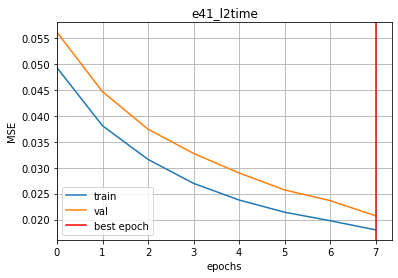

In [13]:
plot_db('/home/enricguso/PycharmProjects/temp_experiments/', 'e41_l2time', 0)

In [30]:
import torch
loss = torch.nn.CrossEntropyLoss()
inputs = torch.randn(3, 5, requires_grad=True)

In [72]:
inputs = torch.randn(4,1000, 16, 2, 265).abs()
inputs = inputs / torch.max(inputs)
inputs = inputs.unbind(0)

In [101]:
#Compute IBM
inputs = torch.stack(inputs)
_, inputs = ready.max(0)
test2=torch.nn.functional.one_hot(inputs,4).unbind(4)